In [13]:
import pandas as pd
import matplotlib.pyplot as plt


In [14]:
data = {
    'UserID': [1, 2, 3, 4, 5, 6],
    'Age': [25, 20, 25, 45, 20, 25],
    'Car': ['Sports', 'Vintage', 'Sports', 'SUV', 'Sports', 'SUV'],
    'Risk': ['L', 'H', 'L', 'H', 'H', 'H']
}

In [15]:
df=pd.DataFrame(data)

In [17]:
df.shape

(6, 4)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   UserID  6 non-null      int64 
 1   Age     6 non-null      int64 
 2   Car     6 non-null      object
 3   Risk    6 non-null      object
dtypes: int64(2), object(2)
memory usage: 324.0+ bytes


In [19]:
df.nunique()

UserID    6
Age       3
Car       3
Risk      2
dtype: int64

In [22]:
df.isnull().sum()

UserID    0
Age       0
Car       0
Risk      0
dtype: int64

In [24]:
from sklearn.preprocessing import LabelEncoder
label_encoder_car = LabelEncoder()
df['Car'] = label_encoder_car.fit_transform(df['Car'])

label_encoder_risk = LabelEncoder()
df['Risk'] = label_encoder_risk.fit_transform(df['Risk'])

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   UserID  6 non-null      int64
 1   Age     6 non-null      int64
 2   Car     6 non-null      int32
 3   Risk    6 non-null      int32
dtypes: int32(2), int64(2)
memory usage: 276.0 bytes


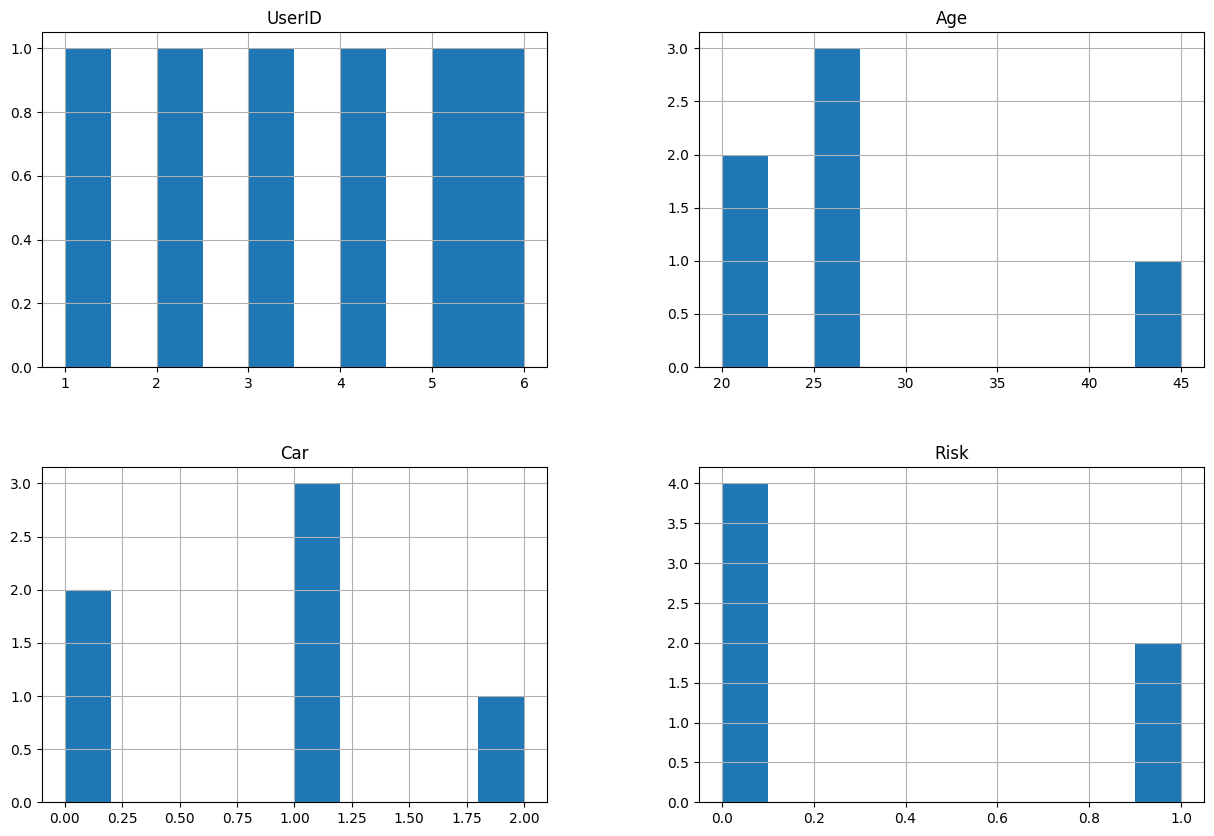

In [26]:
df.hist(figsize=(15,10))
plt.get_figlabels()
plt.show()

In [27]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB   

In [28]:
x=df[['Age','Car']]
y=df['Risk']

In [29]:
nb_G=GaussianNB()
nb_G.fit(x,y)

GaussianNB()

In [30]:
new_data = pd.DataFrame({
    'Age': [25, 23],
    'Car': label_encoder_car.transform(['Sports', 'SUV'])
})

In [32]:
predictions = nb_G.predict(new_data)

In [33]:
# Giải mã
predicted_labels = label_encoder_risk.inverse_transform(predictions)

# Hiển thị kết quả
test_data_with_predictions = new_data.copy()
test_data_with_predictions['Predicted Risk'] = predicted_labels
test_data_with_predictions['Car'] = label_encoder_car.inverse_transform(new_data['Car'])

print(test_data_with_predictions)

   Age     Car Predicted Risk
0   25  Sports              L
1   23     SUV              H
